In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from random import seed

In [2]:
# import coca-cola stock prices from 2012-01-01 to 2014-06-30
url = "https://raw.githubusercontent.com/Maintain9961/Coca-cola/main/KO%20(1).csv"
stock_price = pd.read_csv(url)

In [3]:
stock_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,35.075001,35.355000,35.049999,35.070000,24.902021,15639600
1,2012-01-04,34.955002,35.035000,34.750000,34.849998,24.745810,14239200
2,2012-01-05,34.880001,34.935001,34.674999,34.685001,24.628658,14287600
3,2012-01-06,34.735001,34.814999,34.310001,34.465000,24.472431,13646600
4,2012-01-09,34.500000,34.584999,34.400002,34.465000,24.472431,10522600


In [4]:
stock_price.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
621,2014-06-24,41.520000,41.889999,41.470001,41.849998,31.916443,14962800
622,2014-06-25,41.599998,41.980000,41.459999,41.959999,32.000332,17621800
623,2014-06-26,41.910000,42.049999,41.779999,42.029999,32.053711,16903300
624,2014-06-27,41.990002,42.290001,41.910000,42.189999,32.175739,18674400
625,2014-06-30,41.980000,42.490002,41.820000,42.360001,32.305386,14058700


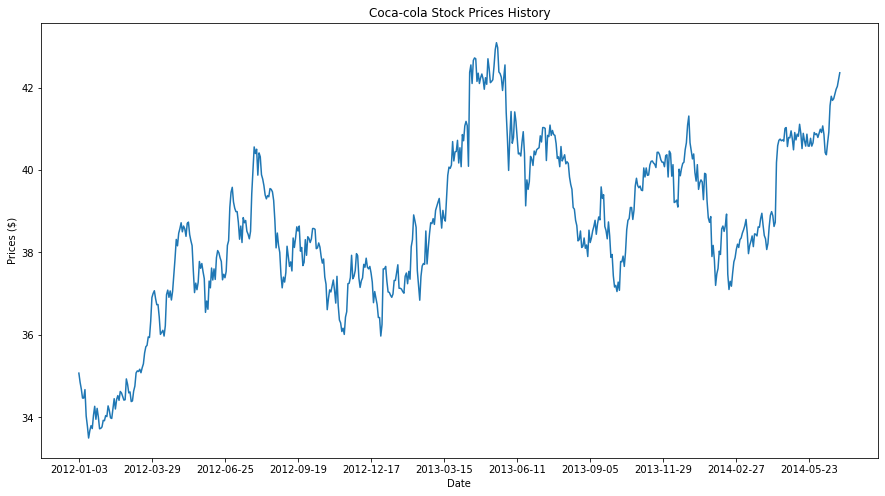

In [5]:
# plot the stock prices
plt.figure(figsize=(15, 8))
plt.title('Coca-cola Stock Prices History')
plt.plot(stock_price["Date"], stock_price['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')
plt.xticks(np.arange(0, len(stock_price['Close']), 60))
plt.show()

In [6]:
# data preprocessing
close_prices = stock_price['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8) # split the data into 80% training data, 20% test data 

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [7]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [8]:
seed(156)
np.random.seed(156)
tf.random.set_seed(156)
simpleRNN = keras.Sequential()
# First simpleRNN layer with Dropout regularisation
simpleRNN.add(layers.SimpleRNN(units=100, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
simpleRNN.add(layers.Dropout(0.2))
# Second simpleRNN layer
simpleRNN.add(layers.SimpleRNN(units=100, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
simpleRNN.add(layers.Dropout(0.2))
# Third simpleRNN layer
simpleRNN.add(layers.SimpleRNN(units=100, return_sequences=True, activation='tanh'))
simpleRNN.add(layers.Dropout(0.2))
# Fourth simpleRNN layer
simpleRNN.add(layers.SimpleRNN(units=100, activation='tanh'))
simpleRNN.add(layers.Dropout(0.2))
# Fully connected layer
simpleRNN.add(layers.Dense(100))
simpleRNN.add(layers.Dropout(0.2))
# The output layer
simpleRNN.add(layers.Dense(units=1))
simpleRNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 60, 100)           10200     
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 60, 100)           20100     
                                                                 
 dropout_1 (Dropout)         (None, 60, 100)           0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 60, 100)           20100     
                                                                 
 dropout_2 (Dropout)         (None, 60, 100)           0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 100)               2

In [9]:
# Compiling the RNN
simpleRNN.compile(optimizer='adam',loss='mean_squared_error')
# Fitting to the training set
rnn_history = simpleRNN.fit(x_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
14/14 [==============================] - 17s 231ms/step - loss: 0.9070
Epoch 2/20
14/14 [==============================] - 4s 279ms/step - loss: 0.4894
Epoch 3/20
14/14 [==============================] - 3s 190ms/step - loss: 0.3451
Epoch 4/20
14/14 [==============================] - 3s 192ms/step - loss: 0.2677
Epoch 5/20
14/14 [==============================] - 3s 206ms/step - loss: 0.1834
Epoch 6/20
14/14 [==============================] - 4s 277ms/step - loss: 0.1847
Epoch 7/20
14/14 [==============================] - 4s 273ms/step - loss: 0.1532
Epoch 8/20
14/14 [==============================] - 3s 180ms/step - loss: 0.1593
Epoch 9/20
14/14 [==============================] - 3s 193ms/step - loss: 0.1491
Epoch 10/20
14/14 [==============================] - 4s 281ms/step - loss: 0.1438
Epoch 11/20
14/14 [==============================] - 3s 180ms/step - loss: 0.1546
Epoch 12/20
14/14 [==============================] - 3s 184ms/step - loss: 0.1439
Epoch 13/20
14/14 [=====

In [10]:
seed(156)
np.random.seed(156)
tf.random.set_seed(156)
regressorGRU = keras.Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(layers.GRU(units=100, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(layers.Dropout(0.2))
# Second GRU layer
regressorGRU.add(layers.GRU(units=100, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(layers.Dropout(0.2))
# Third GRU layer
regressorGRU.add(layers.GRU(units=100, return_sequences=True, activation='tanh'))
regressorGRU.add(layers.Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(layers.GRU(units=100, activation='tanh'))
regressorGRU.add(layers.Dropout(0.2))
# Fully connected layer
regressorGRU.add(layers.Dense(100))
regressorGRU.add(layers.Dropout(0.2))
# The output layer
regressorGRU.add(layers.Dense(units=1))
regressorGRU.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 60, 100)           30900     
                                                                 
 dropout_5 (Dropout)         (None, 60, 100)           0         
                                                                 
 gru_1 (GRU)                 (None, 60, 100)           60600     
                                                                 
 dropout_6 (Dropout)         (None, 60, 100)           0         
                                                                 
 gru_2 (GRU)                 (None, 60, 100)           60600     
                                                                 
 dropout_7 (Dropout)         (None, 60, 100)           0         
                                                                 
 gru_3 (GRU)                 (None, 100)              

In [11]:
# Compiling the RNN
regressorGRU.compile(optimizer='adam',loss='mean_squared_error')
# Fitting to the training set
gru_history = regressorGRU.fit(x_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
14/14 [==============================] - 9s 19ms/step - loss: 0.0672
Epoch 2/20
14/14 [==============================] - 0s 14ms/step - loss: 0.0157
Epoch 3/20
14/14 [==============================] - 0s 13ms/step - loss: 0.0135
Epoch 4/20
14/14 [==============================] - 0s 14ms/step - loss: 0.0098
Epoch 5/20
14/14 [==============================] - 0s 13ms/step - loss: 0.0101
Epoch 6/20
14/14 [==============================] - 0s 14ms/step - loss: 0.0093
Epoch 7/20
14/14 [==============================] - 0s 13ms/step - loss: 0.0086
Epoch 8/20
14/14 [==============================] - 0s 13ms/step - loss: 0.0080
Epoch 9/20
14/14 [==============================] - 0s 12ms/step - loss: 0.0073
Epoch 10/20
14/14 [==============================] - 0s 14ms/step - loss: 0.0071
Epoch 11/20
14/14 [==============================] - 0s 13ms/step - loss: 0.0078
Epoch 12/20
14/14 [==============================] - 0s 13ms/step - loss: 0.0076
Epoch 13/20
14/14 [==================

In [12]:
seed(156)
np.random.seed(156)
tf.random.set_seed(156)
LSTMmodel = keras.Sequential()
# Four LSTM layers
LSTMmodel.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
LSTMmodel.add(layers.Dropout(0.2))
LSTMmodel.add(layers.LSTM(100, return_sequences=True))
LSTMmodel.add(layers.Dropout(0.2))
LSTMmodel.add(layers.LSTM(100, return_sequences=True))
LSTMmodel.add(layers.Dropout(0.2))
LSTMmodel.add(layers.LSTM(100, return_sequences=False))
LSTMmodel.add(layers.Dropout(0.2))
# Fully connected layer
LSTMmodel.add(layers.Dense(100))
LSTMmodel.add(layers.Dropout(0.2))

# Output layer
LSTMmodel.add(layers.Dense(1))
LSTMmodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 dropout_10 (Dropout)        (None, 60, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_11 (Dropout)        (None, 60, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_12 (Dropout)        (None, 60, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100)              

In [13]:
LSTMmodel.compile(optimizer='adam', loss='mean_squared_error')
lstm_history = LSTMmodel.fit(x_train, y_train, batch_size= 32, epochs=20)

Epoch 1/20
14/14 [==============================] - 8s 24ms/step - loss: 0.0706
Epoch 2/20
14/14 [==============================] - 0s 18ms/step - loss: 0.0185
Epoch 3/20
14/14 [==============================] - 0s 20ms/step - loss: 0.0148
Epoch 4/20
14/14 [==============================] - 0s 20ms/step - loss: 0.0143
Epoch 5/20
14/14 [==============================] - 0s 16ms/step - loss: 0.0141
Epoch 6/20
14/14 [==============================] - 0s 14ms/step - loss: 0.0126
Epoch 7/20
14/14 [==============================] - 0s 13ms/step - loss: 0.0104
Epoch 8/20
14/14 [==============================] - 0s 14ms/step - loss: 0.0107
Epoch 9/20
14/14 [==============================] - 0s 14ms/step - loss: 0.0113
Epoch 10/20
14/14 [==============================] - 0s 14ms/step - loss: 0.0104
Epoch 11/20
14/14 [==============================] - 0s 14ms/step - loss: 0.0102
Epoch 12/20
14/14 [==============================] - 0s 13ms/step - loss: 0.0119
Epoch 13/20
14/14 [==================

In [14]:
simpleRNNpredictions = simpleRNN.predict(x_test)
simpleRNNpredictions_original = scaler.inverse_transform(simpleRNNpredictions)
rmse = np.sqrt(np.mean((simpleRNNpredictions_original - y_test)**2))
rmse

4/4 [==============================] - 1s 40ms/step


2.314072758651196

In [15]:
GRUpredictions = regressorGRU.predict(x_test)
GRUpredictions_original = scaler.inverse_transform(GRUpredictions)
rmse = np.sqrt(np.mean((GRUpredictions_original - y_test)**2).mean())
rmse

4/4 [==============================] - 1s 8ms/step


1.7733643709723166

In [16]:
LSTMpredictions = LSTMmodel.predict(x_test)
LSTMpredictions_original = scaler.inverse_transform(LSTMpredictions)
rmse = np.sqrt(np.mean((LSTMpredictions_original - y_test)**2))
rmse

4/4 [==============================] - 1s 8ms/step


1.7923251628954782

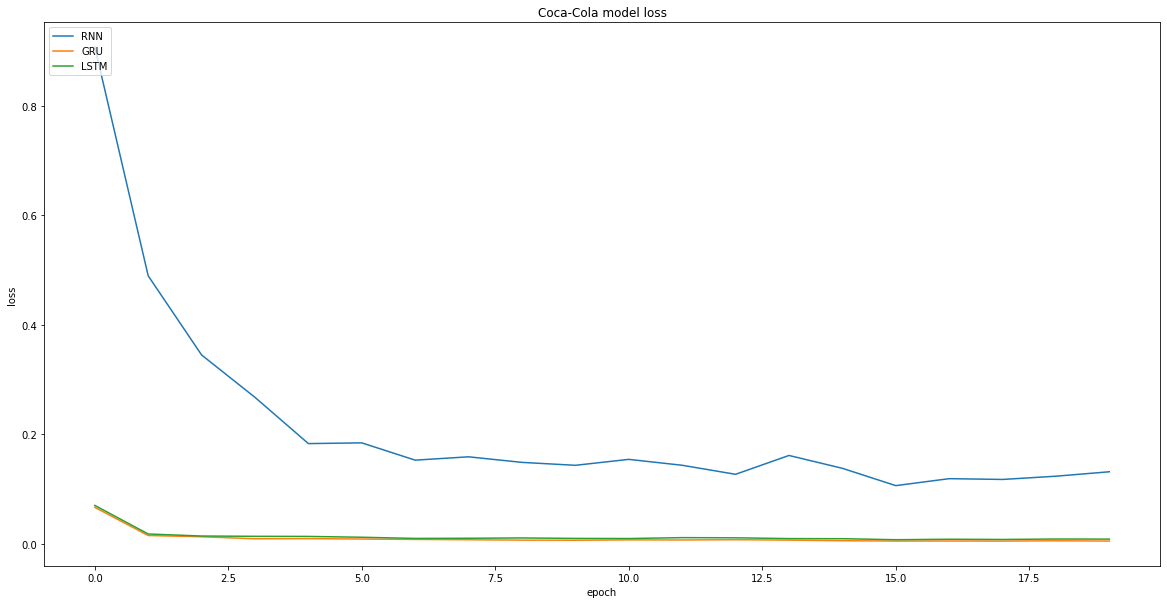

In [22]:
plt.figure(figsize=(20, 10))
plt.plot(rnn_history.history['loss'])
plt.plot(gru_history.history['loss'])
plt.plot(lstm_history.history['loss'])
plt.title('Coca-Cola model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['RNN', 'GRU', 'LSTM'], loc='upper left')
plt.show()

<ipython-input-18-b4c3326cd98d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = simpleRNNpredictions_original


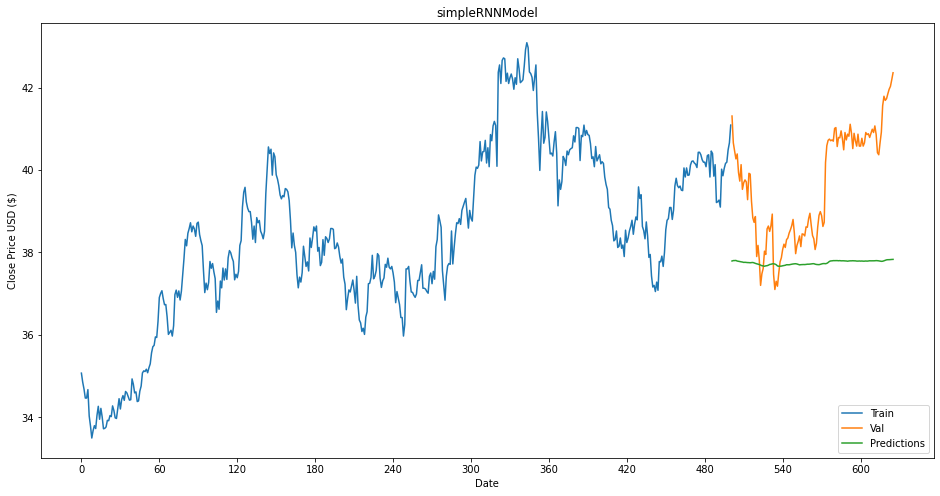

In [18]:
data = stock_price.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = simpleRNNpredictions_original
plt.figure(figsize=(16,8))
plt.title('simpleRNNModel')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.xticks(np.arange(0, len(stock_price['Close']), 60))
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

<ipython-input-19-c96cd47bf436>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = GRUpredictions_original


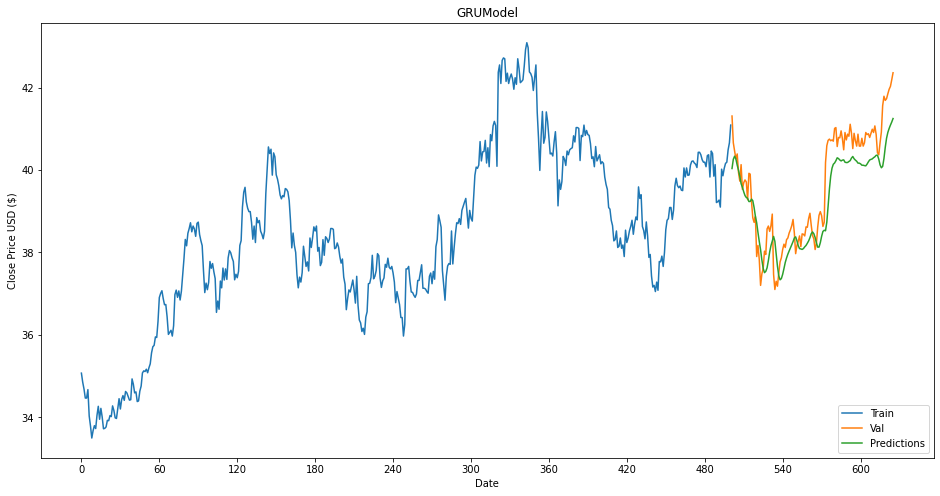

In [19]:
data = stock_price.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = GRUpredictions_original
plt.figure(figsize=(16,8))
plt.title('GRUModel')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.xticks(np.arange(0, len(stock_price['Close']), 60))
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

<ipython-input-20-a3a3d8e24a31>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = LSTMpredictions_original


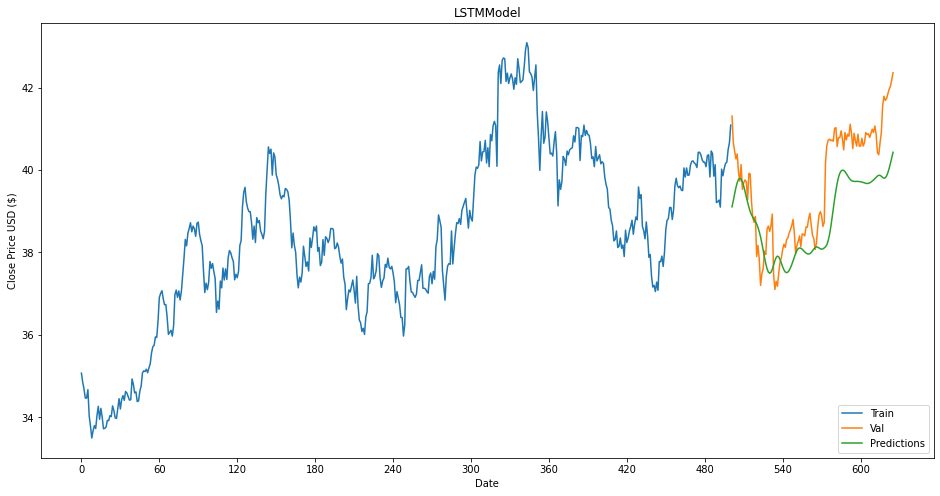

In [20]:
data = stock_price.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = LSTMpredictions_original
plt.figure(figsize=(16,8))
plt.title('LSTMModel')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.xticks(np.arange(0, len(stock_price['Close']), 60))
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

<ipython-input-21-a1cd5d3c9877>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['RNN Predictions'] = simpleRNNpredictions_original
<ipython-input-21-a1cd5d3c9877>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['LSTM Predictions'] = LSTMpredictions_original
<ipython-input-21-a1cd5d3c9877>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

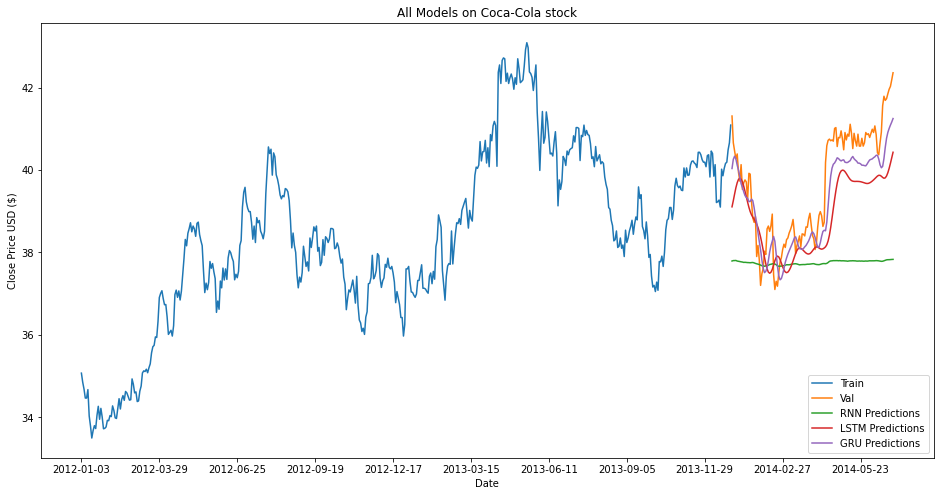

In [21]:
data = stock_price.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['RNN Predictions'] = simpleRNNpredictions_original
validation['LSTM Predictions'] = LSTMpredictions_original
validation['GRU Predictions'] = GRUpredictions_original
plt.figure(figsize=(16,8))
plt.title('All Models on Coca-Cola stock')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.xticks(np.arange(0, len(stock_price['Close']), 60))
plt.plot(stock_price["Date"][:training_data_len], train)
plt.plot(stock_price["Date"][training_data_len:], validation[['Close', 'RNN Predictions']])
plt.plot(stock_price["Date"][training_data_len:], validation[['LSTM Predictions']])
plt.plot(stock_price["Date"][training_data_len:], validation[['GRU Predictions']])
plt.legend(['Train', 'Val', 'RNN Predictions', "LSTM Predictions", "GRU Predictions"], 
           loc='lower right')
plt.show()